In [3]:
import params
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats  

In [9]:
data = pd.read_csv(params.preprocessed_output_dir + "/all_subjects.csv")

Spatial-only block, the green triangle in the boxplot stands for the mean


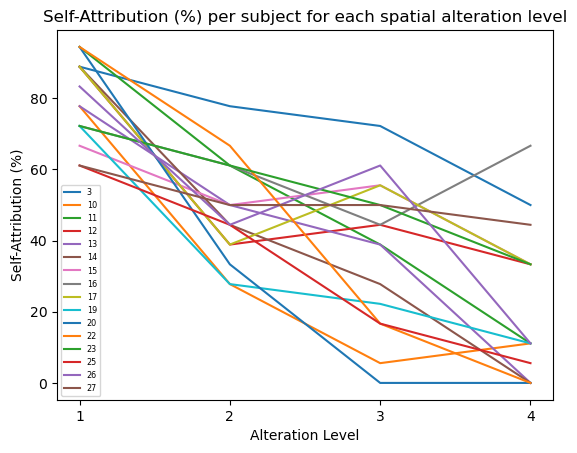

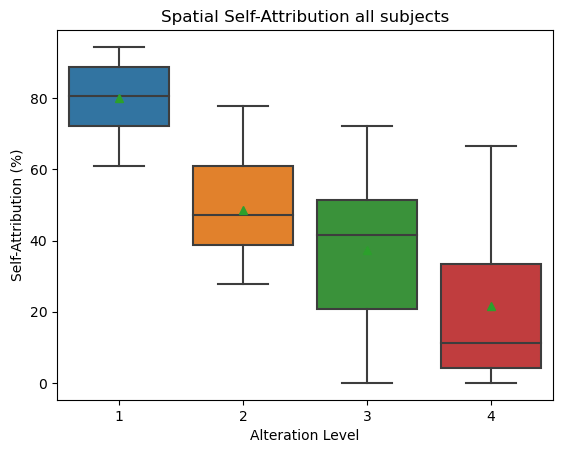

In [3]:
# Spatial alteration only block
# Each subject line plot
print("Spatial-only block, the green triangle in the boxplot stands for the mean")
data.filter(regex=("SpatialBlockL*")).T.plot()
plt.legend(data.subjectNum, fontsize="xx-small")
plt.xticks(range(0,len(list(data.filter(regex=("SpatialBlockL*")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per subject for each spatial alteration level")
plt.show()

# All Subjects boxplot
plot = sns.boxplot(data=data.filter(regex=("SpatialBlockL*")), showmeans=True)
plot.set(xlabel='Alteration Level', ylabel='Self-Attribution (%)', title = "Spatial Self-Attribution all subjects")
plot.set_xticklabels(['1','2','3','4'])
plt.show()

Temporal-only block, the green triangle in the boxplot stands for the mean


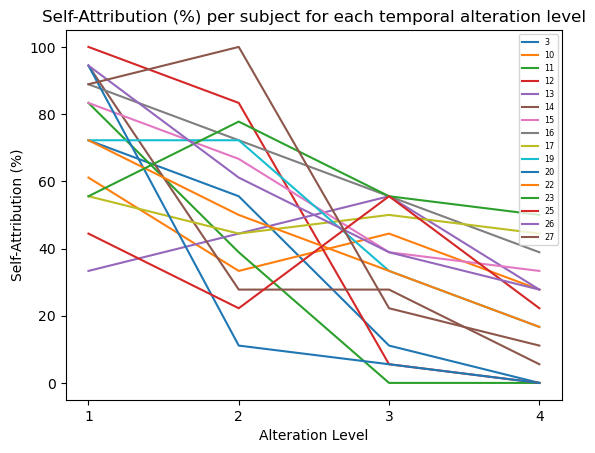

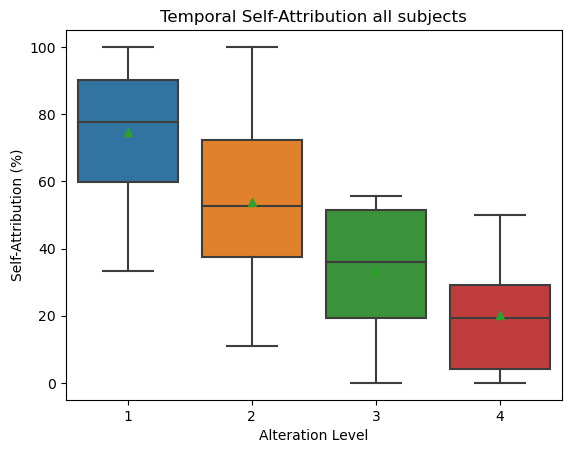

In [4]:
# Temporal alteration only block
# Each subject line plot
print("Temporal-only block, the green triangle in the boxplot stands for the mean")
data.filter(regex=("TemporalBlockL\d+$")).T.plot()
plt.legend(data.subjectNum, fontsize="xx-small")
plt.xticks(range(0,len(list(data.filter(regex=("TemporalBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per subject for each temporal alteration level")
plt.show()

# All subjects boxplot
plot = sns.boxplot(data=data.filter(regex=("TemporalBlockL\d+$")), showmeans = True)
plot.set(xlabel='Alteration Level', ylabel='Self-Attribution (%)', title = "Temporal Self-Attribution all subjects")
plot.set_xticklabels(['1','2','3','4'])
plt.show()

Combined block heatmap self-attribution per combination (T - Temporal, S - Spatial)


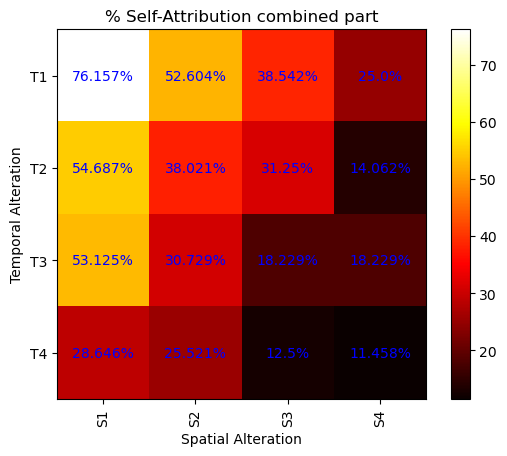

In [5]:
# self attribution across all combined blocks - all subjects
print("Combined block heatmap self-attribution per combination (T - Temporal, S - Spatial)")
combined_data = data.filter(regex=("CombinedBlockT.S."))
combined_data = combined_data.mean(axis=0).to_frame().T
combined_data = combined_data.values.reshape(4, 4)
# Get column and index names
y = ['T{}'.format(t) for t in range(1, 5)]
x = ['S{}'.format(s) for s in range(1, 5)]

# Create heatmap with column and index names
plt.imshow(combined_data, cmap='hot', interpolation='nearest')
plt.xticks(range(len(x)), x, rotation=90)
plt.yticks(range(len(y)), y)
plt.colorbar()
for (j,i),label in np.ndenumerate(combined_data):
    plt.text(i,j,str(round(label,3)) + '%',ha='center',va='center', c='blue')
plt.xlabel('Spatial Alteration')
plt.ylabel('Temporal Alteration')
plt.title('% Self-Attribution combined part')
plt.show()

Spatial alteration direction difficulty comparison


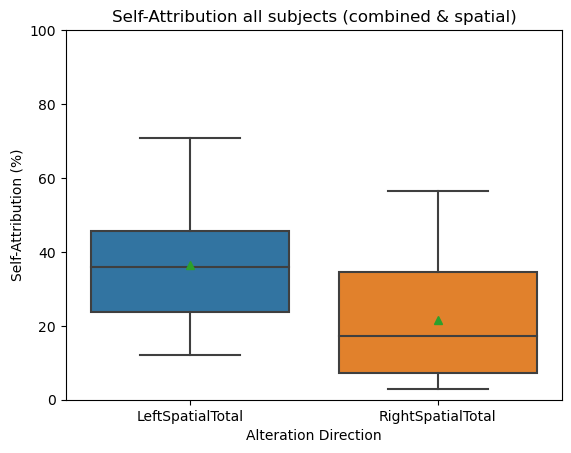

    LeftSpatialTotal  RightSpatialTotal
0             44.444             56.566
1             16.162             26.263
2             25.253             13.131
3             36.364             45.455
4             44.444              4.040
5             32.323              5.051
6             43.434             20.202
7             49.495             35.354
8             59.596             21.212
9             26.263             14.141
10            12.121              3.030
11            17.172              8.081
12            49.495             34.343
13            19.192             13.131
14            35.354             40.404
15            70.707              4.040
Nonparametric wilcoxon test p-value: [0.00918579], Parametric paired t-test p-value: [0.01266245]


In [6]:
# SoA left/right spatial alteration for combined_part + spatial_part
# All subjects boxplot
print("Spatial alteration direction difficulty comparison")
ax = sns.boxplot(data=data.filter(regex=("(?:Left|Right)SpatialTotal")), showmeans=True)
ax.set(xlabel='Alteration Direction', ylabel='Self-Attribution (%)', title = "Self-Attribution all subjects (combined & spatial)")
ax.set_ylim(0,100)
plt.show()

print(data.filter(regex=("(?:Left|Right)SpatialTotal")))

# statistical analysis
left = data.filter(regex=("LeftSpatialTotal$"))
right = data.filter(regex=("RightSpatialTotal$"))
t_statistic_para, p_value_para = stats.ttest_rel(left, right)
wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(left, right)
print("Nonparametric wilcoxon test p-value: " + str(wilcoxon_p_value) + ", Parametric paired t-test p-value: " + str(p_value_para))  

Order effects, first block is counterbalanced


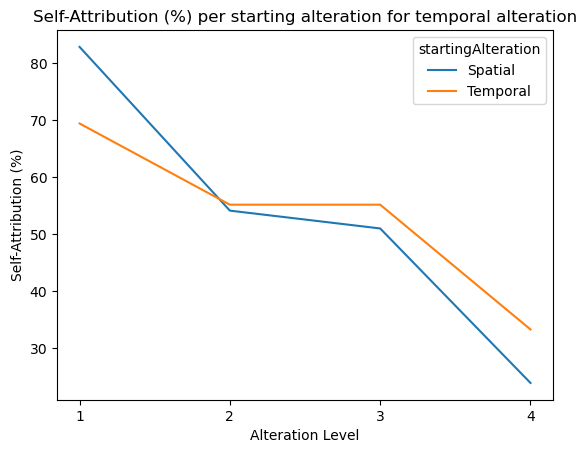

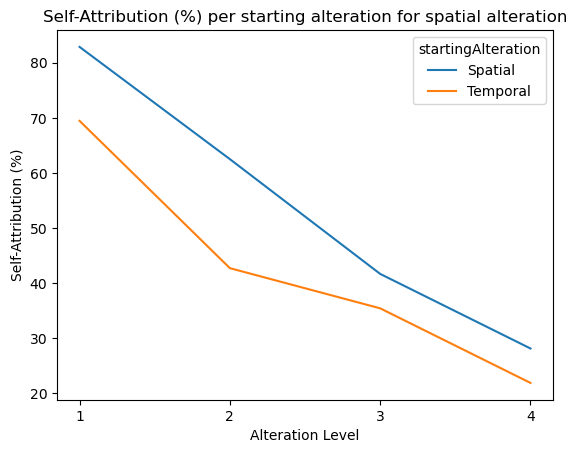

In [7]:
# Understanding the starting alteration effect, looking at the combined block results
print("Order effects, first block is counterbalanced")
grouped_data = data.groupby('startingAlteration').mean()
# Temporal
grouped_data.filter(regex=("CombinedBlockT.S1")).T.plot()
plt.xticks(range(0,len(list(grouped_data.filter(regex=("TemporalBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per starting alteration for temporal alteration")
plt.show()

# Spatial
grouped_data.filter(regex=("CombinedBlockT1S.")).T.plot()
plt.xticks(range(0,len(list(grouped_data.filter(regex=("SpatialBlockL\d+$")).columns))),['1','2','3','4'])
plt.xlabel("Alteration Level")
plt.ylabel("Self-Attribution (%)")
plt.title("Self-Attribution (%) per starting alteration for spatial alteration")
plt.show()

Combined block heatmap response time per combination (T - Temporal, S - Spatial)


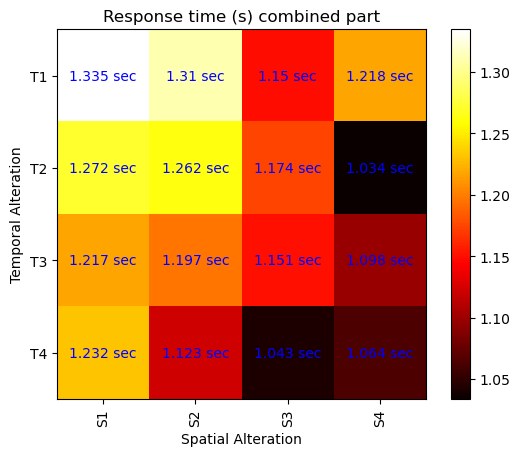

In [10]:
# reaction time heatmap per combination - soon(TM)
print("Combined block heatmap response time per combination (T - Temporal, S - Spatial)")
combined_data = data.filter(regex=("ResponseTimeT.S."))
combined_data = combined_data.mean(axis=0).to_frame().T
combined_data = combined_data.values.reshape(4, 4)
# Get column and index names
y = ['T{}'.format(t) for t in range(1, 5)]
x = ['S{}'.format(s) for s in range(1, 5)]

# Create heatmap with column and index names
plt.imshow(combined_data, cmap='hot', interpolation='nearest')
plt.xticks(range(len(x)), x, rotation=90)
plt.yticks(range(len(y)), y)
plt.colorbar()
for (j,i),label in np.ndenumerate(combined_data):
    plt.text(i,j,str(round(label,3)) + " sec",ha='center',va='center', c='blue')
plt.xlabel('Spatial Alteration')
plt.ylabel('Temporal Alteration')
plt.title('Response time (s) combined part')
plt.show()